In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("Leads.csv")

In [3]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
data.shape

(9240, 37)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# columns which have more than 30% data as null values

NA_data=data.isnull().sum()
NA_data = NA_data[NA_data.values >(0.30*len(data))]
print(len(NA_data))
NA_data

6


Tags                           3353
Lead Quality                   4767
Asymmetrique Activity Index    4218
Asymmetrique Profile Index     4218
Asymmetrique Activity Score    4218
Asymmetrique Profile Score     4218
dtype: int64

#  Data Cleaning and EDA

In [9]:

# Converting all the values to lower case
data = data.applymap(lambda s:s.lower() if type(s) == str else s)

In [10]:
#Converting 'Select' values to NaN.

data = data.replace('Select', np.nan)

In [11]:

# Checking if there are columns with one unique value since it won't affect our analysis
data.nunique() 

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

- We can drop all the columns with only single value, because they dont help us in data modelling

In [12]:
# Dropping unique valued columns
data= data.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [13]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums          

In [14]:
#checking percentage of null values in each column

round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [15]:
#dropping cols with more than 35% missing values

cols=data.columns

for i in cols:
    if((100*(data[i].isnull().sum()/len(data.index))) >= 45):
        data.drop(i, 1, inplace = True)

In [16]:
data.shape

(9240, 27)

In [17]:
#checking percentage of null values in each column

round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [18]:
# Let look into country column

data["Country"].describe()

# India seems to be covering most of the data , so lets replace the nan values with India

data['Country'] = data['Country'].replace(np.nan,'India')
data["Country"].isnull().sum()

# Country column is settled now

0

In [19]:
#lets look into specialization column
data["Specialization"].describe()
# Here it is ideal to replace Nan with "not-provided"
data['Specialization'] = data['Specialization'].fillna('not provided') 
data["Country"].isnull().sum()

0

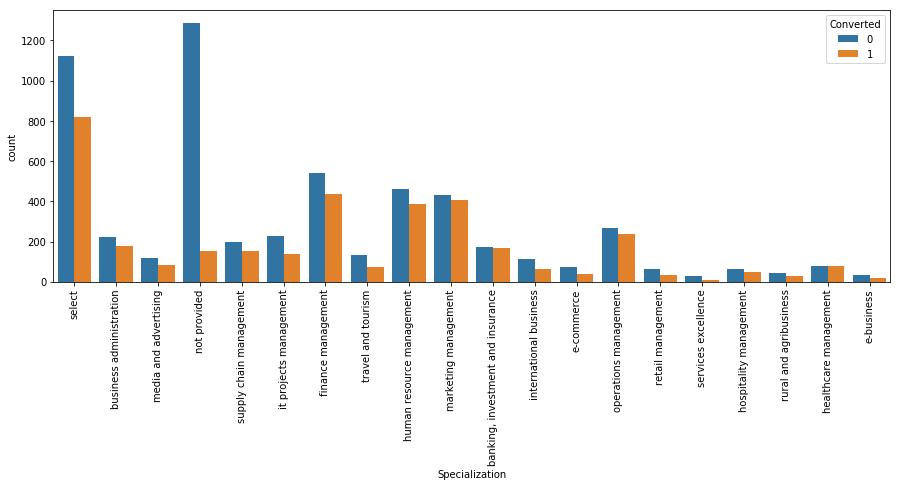

In [20]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(data.Specialization, hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [21]:
#combining Management Specializations because they show similar trends because lead conversion is high

data['Specialization'] = data['Specialization'].replace(['finance management','human resource management',
                                                           'marketing management','operations management',
                                                           'it projects management','supply chain management',
                                                    'healthcare management','hospitality management',
                                                           'retail management'] ,'Management_Specializations')  

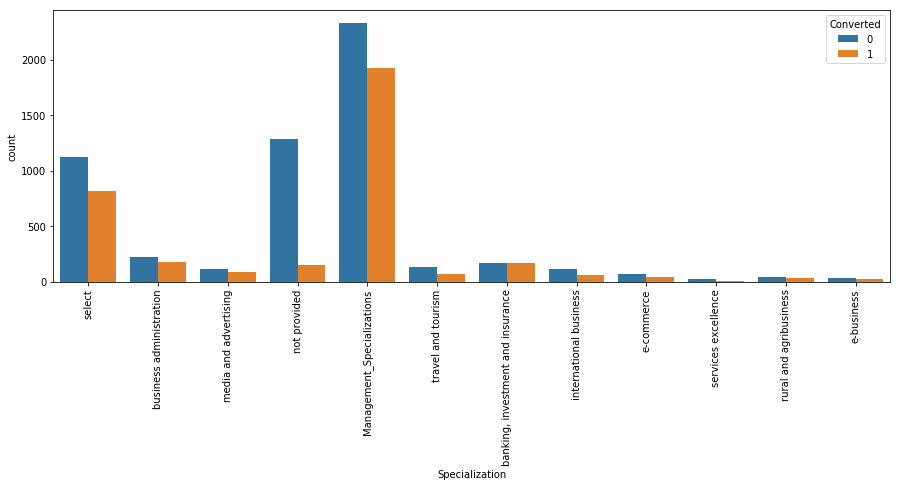

In [22]:
plt.figure(figsize=(15,5))
s1=sns.countplot(data.Specialization, hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [23]:
#looking into :"What is your current occupation" column
data['What is your current occupation'].value_counts(dropna=False)

unemployed              5600
NaN                     2690
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
#replacing NaN with "unemployed"
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'unemployed')
#data['What is your current occupation'] = data['What is your current occupation'].replace('Unemployed', 'unemployed')
data['What is your current occupation'].isnull().sum()

0

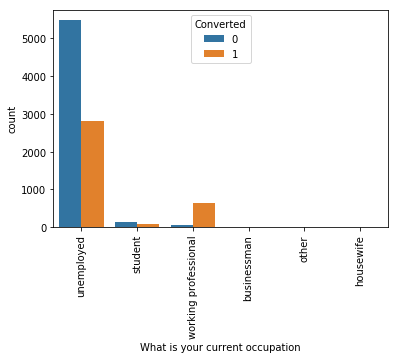

In [25]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(data['What is your current occupation'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Working Professionals going for the course have high chances of joining it.
- Unemployed conversion is bad

In [26]:
#checking value counts

data['What matters most to you in choosing a course'].value_counts(dropna=False)

better career prospects      6528
NaN                          2709
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [27]:
#replacing Nan values with Mode "Better Career Prospects"

data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan,'better career prospects')

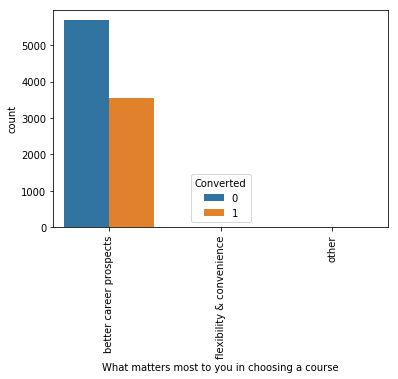

In [28]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(data['What matters most to you in choosing a course'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [29]:
#checking value counts

data['What matters most to you in choosing a course'].value_counts(dropna=False)

better career prospects      9237
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [30]:
# we can drop this column because its totally skewed to "better career prospects"


data= data.drop(['What matters most to you in choosing a course' ],axis=1)

In [31]:
#checking percentage of missing values
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                    0.00
Specialization                             0.00
How did you hear about X Education        23.89
What is your current occupation            0.00
Search                                     0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                 

In [32]:
#checking value counts of Tag variable
data['Tags'].value_counts(dropna=False)

NaN                                                  3353
will revert after reading the email                  2072
ringing                                              1203
interested in other courses                           513
already a student                                     465
closed by horizzon                                    358
switched off                                          240
busy                                                  186
lost to eins                                          175
not doing further education                           145
interested  in full time mba                          117
graduation in progress                                111
invalid number                                         83
diploma holder (not eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [33]:
#replacing Nan values with "Not Specified"
data['Tags'] = data['Tags'].replace(np.nan,'Not Specified')


In [34]:
#replacing tags with low frequency with "Other Tags"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

data['Tags'] = data['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [35]:
#checking percentage of missing values
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                    0.00
Specialization                             0.00
How did you hear about X Education        23.89
What is your current occupation            0.00
Search                                     0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                 

In [36]:
#checking value counts

data['How did you hear about X Education'].value_counts(dropna=False)

select                   5043
NaN                      2207
online search             808
word of mouth             348
student of someschool     310
other                     186
multiple sources          152
advertisements             70
social media               67
email                      26
sms                        23
Name: How did you hear about X Education, dtype: int64

In [37]:
#Here we can replace NaN with select

data['How did you hear about X Education'] = data['How did you hear about X Education'].replace(np.nan,'select')

In [38]:
#checking value counts

print(data['How did you hear about X Education'].value_counts(dropna=False))

#we know that select here means nothing so we can drop this column as most of the data is select
data= data.drop(['How did you hear about X Education'],axis=1)

select                   7250
online search             808
word of mouth             348
student of someschool     310
other                     186
multiple sources          152
advertisements             70
social media               67
email                      26
sms                        23
Name: How did you hear about X Education, dtype: int64


In [39]:
#checking value counts

data['Lead Profile'].value_counts(dropna=False)

select                         4146
NaN                            2709
potential lead                 1613
other leads                     487
student of someschool           241
lateral student                  24
dual specialization student      20
Name: Lead Profile, dtype: int64

In [40]:
# Here are also we can replace nan with select

data['Lead Profile'] = data['Lead Profile'].replace(np.nan,'select')
data['Lead Profile'].value_counts(dropna=False)
#Lead profile also have select as majority which actually means nothing so dropping the columns

select                         6855
potential lead                 1613
other leads                     487
student of someschool           241
lateral student                  24
dual specialization student      20
Name: Lead Profile, dtype: int64

In [41]:
data= data.drop(['Lead Profile'],axis=1)

In [42]:
#checking value counts of "City" column

data['City'].value_counts(dropna=False)

mumbai                         3222
select                         2249
NaN                            1420
thane & outskirts               752
other cities                    686
other cities of maharashtra     457
other metro cities              380
tier ii cities                   74
Name: City, dtype: int64

In [43]:
data['City'] = data['City'].replace(np.nan,'Mumbai')

In [44]:
#checking percentage of null values in each column

round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Country                                   0.00
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Tags                                      0.00
City         

In [45]:
#checking value counts of Lead Source column

data['Lead Source'].value_counts(dropna=False)

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
NaN                    36
bing                    6
click2call              4
social media            2
press_release           2
live chat               2
welearn                 1
blog                    1
welearnblog_home        1
testone                 1
nc_edm                  1
youtubechannel          1
pay per click ads       1
Name: Lead Source, dtype: int64

In [46]:
#replacing nan with others
data['Lead Source'] = data['Lead Source'].replace(np.nan,'others')

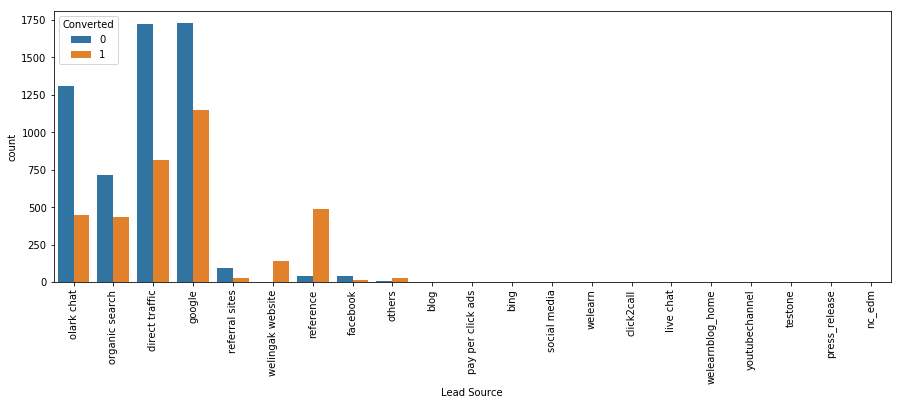

In [47]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(data['Lead Source'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Maximum number of leads are generated by Google and Direct traffic.
- Conversion Rate of reference leads and leads through welingak website is high.
- To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [48]:
#checking value counts of  'Last Activity' column

data['Last Activity'].value_counts(dropna=False)

email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
NaN                              103
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
resubscribed to emails             1
visited booth in tradeshow         1
Name: Last Activity, dtype: int64

In [49]:
#replacing nan with others and also low frequency with others
data['Last Activity'] = data['Last Activity'].replace(np.nan,'others')
data['Last Activity'] = data['Last Activity'].replace(["resubscribed to emails","visited booth in tradeshow","email received","email marked spam","view in browser link clicked","view in browser link clicked","approached upfront"],'others')
len(data['Last Activity'].unique())

12

In [50]:
#checking percentage of null values in each column

round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Country                                   0.00
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Tags                                      0.00
City         

In [51]:
data['Last Activity'].unique()
#"TotalVisits" and Page Views Per Visit  is little tricky , so dropping rows 
#which have nan as there are only 1.5% rows and it wont effect the model

array(['page visited on website', 'email opened', 'unreachable',
       'converted to lead', 'olark chat conversation', 'email bounced',
       'email link clicked', 'form submitted on website', 'unsubscribed',
       'had a phone conversation', 'others', 'sms sent'], dtype=object)

In [52]:
data = data.dropna()


In [53]:
#checking percentage of null values in each column

round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
City                              

In [54]:
# Removing lead number and prospect ID as they are unique for each customer
data.drop(["Prospect ID","Lead Number"],axis=1,inplace=True)

In [55]:
#checking value counts for Do Not Call
data['Do Not Call'].value_counts(dropna=False)

no     9101
yes       2
Name: Do Not Call, dtype: int64

In [56]:
#imbalance dropping column
data.drop(["Do Not Call"],axis=1,inplace=True)

In [57]:
#checking value counts for Do Not Email
data['Do Not Email'].value_counts(dropna=False)

no     8379
yes     724
Name: Do Not Email, dtype: int64

In [58]:
#data imbalance dropping column
data.drop(["Do Not Email"],axis=1,inplace=True)

In [59]:
data['Search'].value_counts(dropna=False)

no     9089
yes      14
Name: Search, dtype: int64

In [60]:
#data imbalance dropping column
data.drop(['Search'],axis=1,inplace=True)

In [61]:
data['Country'].value_counts(dropna=False)

india                   6492
India                   2324
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
germany                    4
nigeria                    4
canada                     4
kuwait                     4
south africa               4
sweden                     3
philippines                2
belgium                    2
china                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
ghana                      2
uganda                     2
italy                      2
tanzania                   1
sri lanka                  1
vietnam                    1
switzerland                1
indonesia                  1
malaysia      

In [62]:
#data imbalance dropping column
data.drop(['Country'],axis=1,inplace=True)

In [63]:
#data imbalance dropping column
data.drop(["Newspaper Article"],axis=1,inplace=True)

In [64]:
#data imbalance dropping column
data.drop(["X Education Forums"],axis=1,inplace=True)

In [65]:
#data imbalance dropping column
data.drop(["Newspaper"],axis=1,inplace=True)

In [66]:
#data imbalance dropping column
data.drop(['Digital Advertisement'],axis=1,inplace=True)

In [67]:
#data imbalance dropping column
data.drop(['Through Recommendations'],axis=1,inplace=True)

In [68]:
#data imbalance dropping column
data.drop(['A free copy of Mastering The Interview'],axis=1,inplace=True)

In [69]:
#checking value counts of last Notable Activity
data['Last Notable Activity'].value_counts()

modified                        3270
email opened                    2827
sms sent                        2172
page visited on website          318
olark chat conversation          183
email link clicked               173
email bounced                     60
unsubscribed                      47
unreachable                       32
had a phone conversation          14
email marked spam                  2
form submitted on website          1
approached upfront                 1
email received                     1
view in browser link clicked       1
resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

In [70]:
#clubbing lower frequency values

data['Last Notable Activity'] = data['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

In [71]:
data.shape

(9103, 12)

In [72]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [73]:
data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity
0,api,olark chat,0,0.0,0,0.0,page visited on website,select,unemployed,interested in other courses,select,modified
1,api,organic search,0,5.0,674,2.5,email opened,select,unemployed,ringing,select,email opened
2,landing page submission,direct traffic,1,2.0,1532,2.0,email opened,business administration,student,will revert after reading the email,mumbai,email opened
3,landing page submission,direct traffic,0,1.0,305,1.0,unreachable,media and advertising,unemployed,ringing,mumbai,modified
4,landing page submission,google,1,2.0,1428,1.0,converted to lead,select,unemployed,will revert after reading the email,mumbai,modified


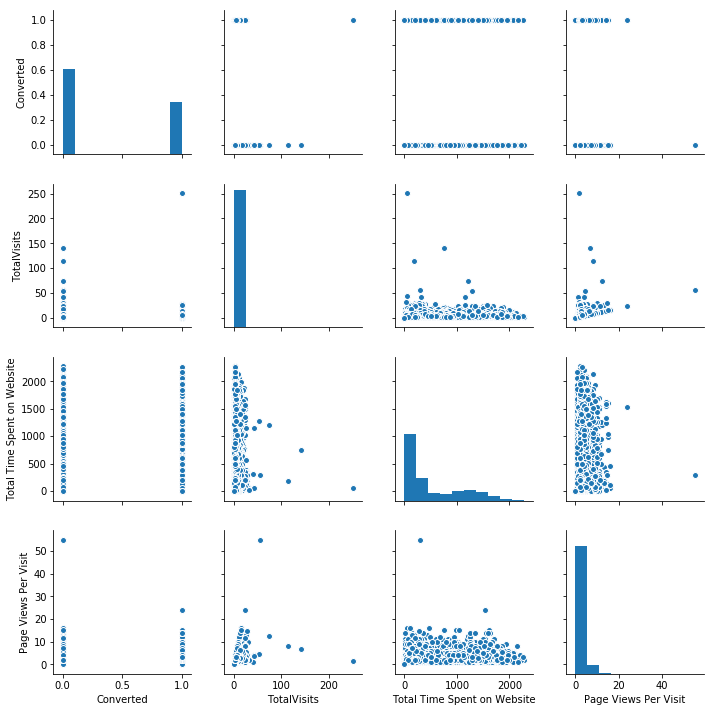

In [74]:
# Visualizing numerical variables pairing up with target variable 'Converted'
sns.pairplot(data, vars = ['Converted','TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'])
plt.show()

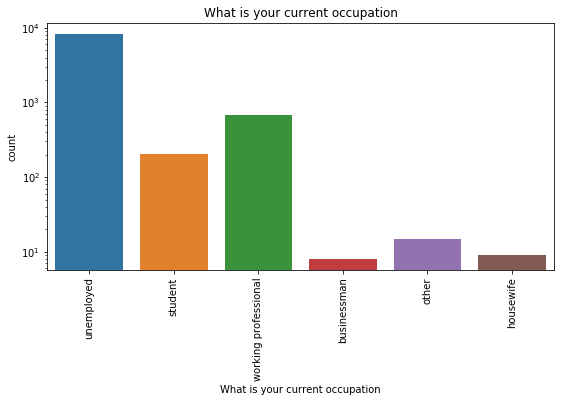

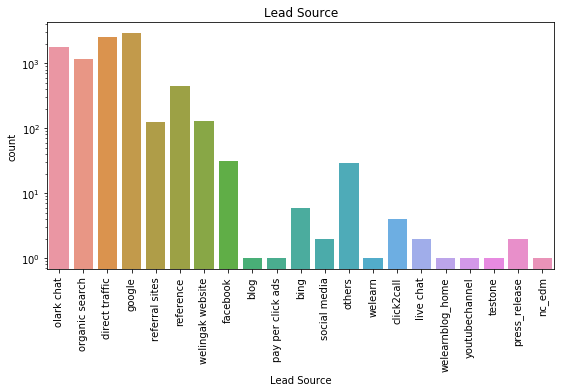

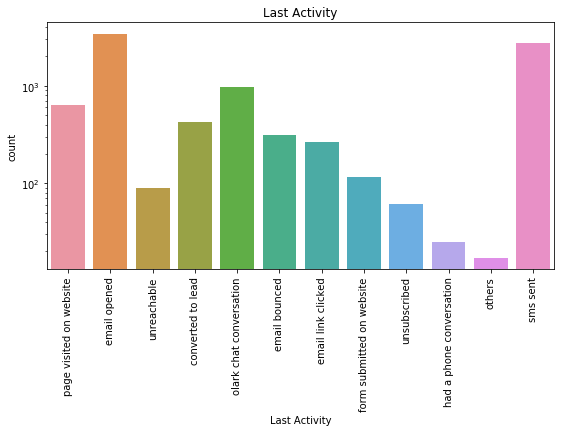

In [79]:
Matrix = ['What is your current occupation','Lead Source','Last Activity']
for i in enumerate(Matrix):
    plt.figure(figsize = (20,10))
    ax = plt.subplot(2,2, i[0]+1)
    sns.countplot(data[i[1]])
    plt.yscale('log')
    plt.xticks(rotation=90)
    ax.set_title(i[1])

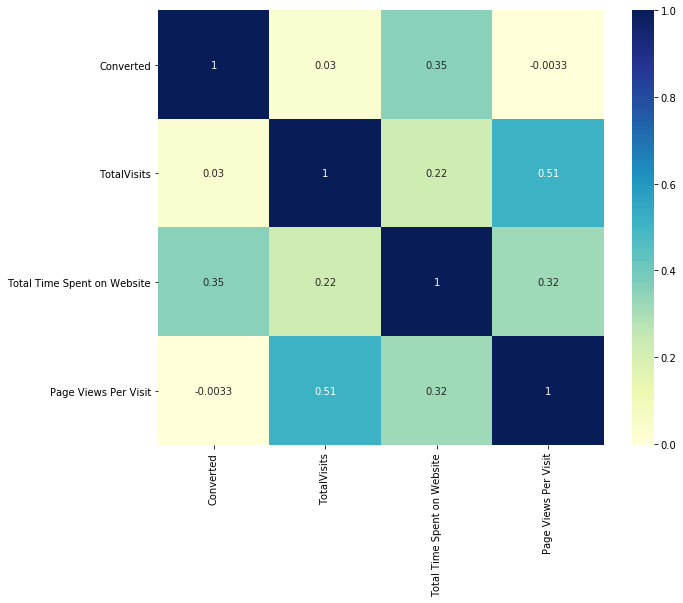

In [75]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

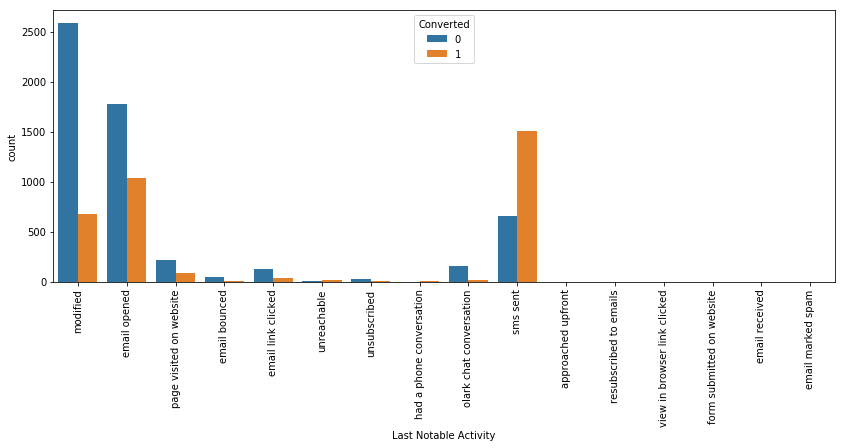

In [76]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data =data)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()


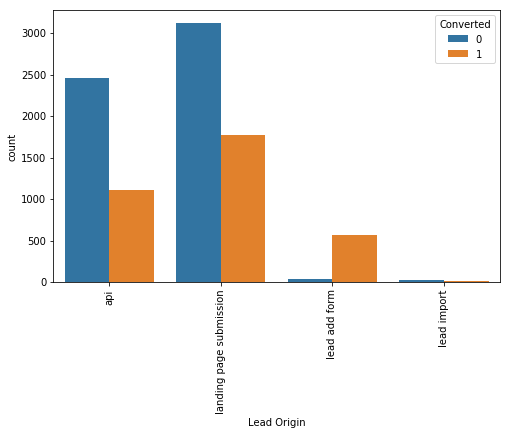

In [78]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(data['Lead Origin'], hue=data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
Lead Origin                        9103 non-null object
Lead Source                        9103 non-null object
Converted                          9103 non-null int64
TotalVisits                        9103 non-null float64
Total Time Spent on Website        9103 non-null int64
Page Views Per Visit               9103 non-null float64
Last Activity                      9103 non-null object
Specialization                     9103 non-null object
What is your current occupation    9103 non-null object
Tags                               9103 non-null object
City                               9103 non-null object
Last Notable Activity              9103 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 1.2+ MB


##### lets look into three numerical columns for outlier analysis
- TotalVisits 
- Total Time Spent on Website
- Page Views Per Visit


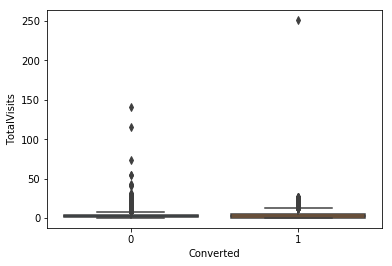

In [81]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)
plt.show()

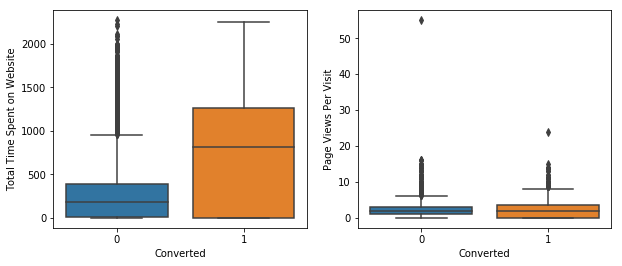

In [82]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.boxplot(x=data.Converted,y=data['Total Time Spent on Website'])
plt.subplot(122)
sns.boxplot(x=data.Converted,y=data['Page Views Per Visit'])
plt.show()

In [83]:

Q1 =  data['TotalVisits'].quantile(0.01)
Q3 =  data['TotalVisits'].quantile(0.99)

data = data[(data.TotalVisits <= Q3)]
data = data[(data.TotalVisits >= Q1)]



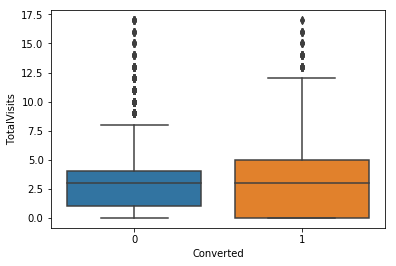

In [84]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)
plt.show()

In [85]:


Q1 =  data['Page Views Per Visit'].quantile(0.01)
Q3 =  data['Page Views Per Visit'].quantile(0.99)

data = data[(data.TotalVisits <= Q3)]
data = data[(data.TotalVisits >= Q1)]

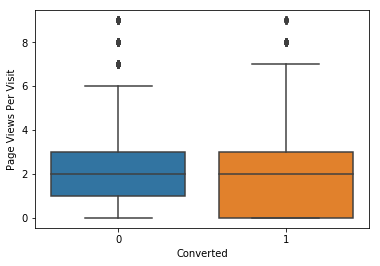

In [86]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data)
plt.show()

In [87]:
# outlier analysis , we focused on converted outlier analysis , so "total time
#spent on website" does not need outlier analysis

#  Creating Dummy Variables for categorical

In [88]:
#fetching categorical columns
cat_cols= data.select_dtypes(include=['object']).columns
print(len(cat_cols))
cat_cols


8


Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [89]:
dummy = pd.get_dummies(data['Lead Origin'],prefix ='Lead Origin', drop_first=True)

data = pd.concat([data,dummy],1)


In [90]:
dummy = pd.get_dummies(data['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_others'], 1)
data = pd.concat([data, dummy], axis = 1)

In [91]:
dummy = pd.get_dummies(data['Last Activity'], prefix  = 'Last Activity')
dummy.head()

,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_email opened,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Last Activity_others,Last Activity_page visited on website,Last Activity_sms sent,Last Activity_unreachable,Last Activity_unsubscribed
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [92]:
dummy = pd.get_dummies(data['Specialization'], prefix  = 'Specialization') 
dummy = dummy.drop(['Specialization_select'], 1)
data = pd.concat([data, dummy], axis = 1)

In [93]:
dummy = pd.get_dummies(data['What is your current occupation'],prefix ='occupation' ,drop_first=True)
dummy.head()
data = pd.concat([data,dummy],1)

In [94]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(data['City'],prefix ='City' , drop_first=True)

data = pd.concat([data,dummy],1)

In [95]:
data["Tags"].head()

0            interested in other courses
1                                ringing
2    will revert after reading the email
3                                ringing
4    will revert after reading the email
Name: Tags, dtype: object

In [96]:
dummy = pd.get_dummies(data['Tags'],prefix ='Tags' , drop_first=True)

data = pd.concat([data,dummy],1)

In [97]:
dummy = pd.get_dummies(data['Last Notable Activity'],prefix ='Last Notable Activity' , drop_first=True)

data = pd.concat([data,dummy],1)

In [98]:
data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,0,0.0,0,0.0,page visited on website,select,unemployed,interested in other courses,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,0,5.0,674,2.5,email opened,select,unemployed,ringing,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,1,2.0,1532,2.0,email opened,business administration,student,will revert after reading the email,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,0,1.0,305,1.0,unreachable,media and advertising,unemployed,ringing,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,1,2.0,1428,1.0,converted to lead,select,unemployed,will revert after reading the email,...,0,0,1,0,0,0,0,0,0,0


In [99]:
data_final = data.drop(cat_cols, 1)
data_final.shape

(8636, 87)

In [100]:
data_final.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_landing page submission',
       'Lead Origin_lead add form', 'Lead Origin_lead import',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_click2call',
       'Lead Source_direct traffic', 'Lead Source_facebook',
       'Lead Source_google', 'Lead Source_live chat', 'Lead Source_nc_edm',
       'Lead Source_olark chat', 'Lead Source_organic search',
       'Lead Source_pay per click ads', 'Lead Source_press_release',
       'Lead Source_reference', 'Lead Source_referral sites',
       'Lead Source_social media', 'Lead Source_testone',
       'Lead Source_welearn', 'Lead Source_welearnblog_home',
       'Lead Source_welingak website', 'Lead Source_youtubechannel',
       'Specialization_Management_Specializations',
       'Specialization_banking, investment and insurance',
       'Specialization_business administration', 'Specialization_e-business',
       'Specializat

# Splitting data

In [101]:
from sklearn.model_selection import train_test_split

In [102]:

X = data_final.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_bing,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [103]:
y = data_final['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [104]:

# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [105]:

# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_bing,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3307,0.444444,0.566021,0.444444,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1090,0.444444,0.727553,0.222222,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8302,0.222222,0.161972,0.222222,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7205,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1747,0.222222,0.672535,0.222222,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Data Modelling

- There are lot of variables , we will start with RFE and drop unnecessary columns

In [106]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [107]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [108]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_landing page submission', False, 17),
 ('Lead Origin_lead add form', False, 18),
 ('Lead Origin_lead import', False, 45),
 ('Lead Source_bing', False, 49),
 ('Lead Source_blog', False, 69),
 ('Lead Source_click2call', False, 56),
 ('Lead Source_direct traffic', False, 5),
 ('Lead Source_facebook', False, 39),
 ('Lead Source_google', False, 6),
 ('Lead Source_live chat', False, 68),
 ('Lead Source_nc_edm', False, 25),
 ('Lead Source_olark chat', False, 43),
 ('Lead Source_organic search', False, 4),
 ('Lead Source_pay per click ads', False, 67),
 ('Lead Source_press_release', False, 66),
 ('Lead Source_reference', False, 19),
 ('Lead Source_referral sites', False, 9),
 ('Lead Source_social media', False, 63),
 ('Lead Source_testone', False, 60),
 ('Lead Source_welearn', False, 62),
 ('Lead Source_welearnblog_home', False, 48),
 ('Lead Source_welingak website', Tru

In [109]:
col = X_train.columns[rfe.support_]

In [110]:

# Selecting columns selected by RFE
X_train = X_train[col]

In [111]:
# Now we will start with statistical Analysis

In [112]:
import statsmodels.api as sm

# Building Model -1

In [113]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6045
Model:                            GLM   Df Residuals:                     6029
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1122.0
Date:                Thu, 03 Sep 2020   Deviance:                       2244.1
Time:                        13:15:05   Pearson chi2:                 1.05e+04
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.9637      0.103    -28.817      0.000      -3.165      -2.762
Total Time Spent on Website                  3.5398      0.232     15.278      0.000       3.086       3.994
Lead Source_welingak website                 4.5684      1.032      4.426      0.000       2.546       6.591
City_select                                  2.0075      0.142     14.160      0.000       1.730       2.285
Tags_Other_Tags                             -4.3992      0.534     -8.242      0.000      -5.445      -3.353
Tags_already a student                      -3.9946      0.724     -5.515      0.000      -5.414      -2.575
Tags_closed by horizzon                      6.4289      0.720      8.934      0.000       5.018       7.839
Tags_diploma holder (not eligible)          -2.9272      1.052     -2.781      0.005      -4.990      -0.864
Tags_graduation in progress                 -1.6932      0.563     -3.008      0.003      -2.796      -0.590
Tags_interested  in full time mba           -3.0430      1.023     -2.974      0.003      -5.048      -1.038
Tags_interested in other courses            -3.5056      0.454     -7.721      0.000      -4.396      -2.616
Tags_lost to eins                            5.0191      0.524      9.586      0.000       3.993       6.045
Tags_not doing further education           -23.1818   1.37e+04     -0.002      0.999    -2.7e+04    2.69e+04
Tags_ringing                                -4.1942      0.284    -14.774      0.000      -4.751      -3.638
Tags_will revert after reading the email     4.7505      0.185     25.649      0.000       4.388       5.114
Last Notable Activity_sms sent               2.6521      0.138     19.262      0.000       2.382       2.922
============================================================================================================
"""

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Time Spent on Website,1.64
13,Tags_will revert after reading the email,1.64
14,Last Notable Activity_sms sent,1.55
2,City_select,1.42
12,Tags_ringing,1.17
9,Tags_interested in other courses,1.11
1,Lead Source_welingak website,1.06
4,Tags_already a student,1.06
5,Tags_closed by horizzon,1.06
3,Tags_Other_Tags,1.05


In [115]:
# VIF values are below 5 , so they are fine , P values are high , lets remove "Tags_not doing further education"

In [116]:
X_train.drop('Tags_not doing further education', axis = 1, inplace = True)

# Building Model -2

In [117]:

# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6045
Model:                            GLM   Df Residuals:                     6030
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1140.0
Date:                Thu, 03 Sep 2020   Deviance:                       2280.0
Time:                        13:15:07   Pearson chi2:                 1.06e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.0181      0.103    -29.226      0.000      -3.220      -2.816
Total Time Spent on Website                  3.5136      0.230     15.306      0.000       3.064       3.964
Lead Source_welingak website                 4.6677      1.031      4.528      0.000       2.647       6.688
City_select                                  1.9396      0.139     14.003      0.000       1.668       2.211
Tags_Other_Tags                             -4.3541      0.533     -8.165      0.000      -5.399      -3.309
Tags_already a student                      -3.8813      0.723     -5.366      0.000      -5.299      -2.464
Tags_closed by horizzon                      6.4930      0.720      9.024      0.000       5.083       7.903
Tags_diploma holder (not eligible)          -2.8469      1.056     -2.695      0.007      -4.917      -0.777
Tags_graduation in progress                 -1.5966      0.563     -2.838      0.005      -2.699      -0.494
Tags_interested  in full time mba           -2.9409      1.022     -2.877      0.004      -4.944      -0.938
Tags_interested in other courses            -3.3964      0.454     -7.484      0.000      -4.286      -2.507
Tags_lost to eins                            5.0847      0.523      9.717      0.000       4.059       6.110
Tags_ringing                                -4.1424      0.283    -14.632      0.000      -4.697      -3.588
Tags_will revert after reading the email     4.8096      0.185     25.965      0.000       4.447       5.173
Last Notable Activity_sms sent               2.7104      0.137     19.772      0.000       2.442       2.979
============================================================================================================
"""

In [118]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Tags_will revert after reading the email,1.63
0,Total Time Spent on Website,1.62
13,Last Notable Activity_sms sent,1.55
2,City_select,1.41
11,Tags_ringing,1.17
9,Tags_interested in other courses,1.11
1,Lead Source_welingak website,1.06
4,Tags_already a student,1.06
5,Tags_closed by horizzon,1.06
3,Tags_Other_Tags,1.05


In [119]:
 # VIF values are less than 5 and p values are also less than 0.05 , so model creation is done

# Prediction

In [120]:

# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]


3307    0.998485
1090    0.997603
8302    0.020213
7205    0.006966
1747    0.999850
5265    0.085601
8345    0.046615
6452    0.995889
4935    0.999706
3602    0.844270
dtype: float64

In [121]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.9984847 , 0.99760323, 0.02021277, 0.00696562, 0.99984997,
       0.085601  , 0.04661492, 0.99588929, 0.9997065 , 0.84427005])

In [122]:
 # Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.998485
1,1,0.997603
2,0,0.020213
3,0,0.006966
4,1,0.999850


In [123]:
 # Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.998485,1
1,1,0.997603,1
2,0,0.020213,0
3,0,0.006966,0
4,1,0.999850,1


# Model Evaluation

In [124]:

# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [125]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3654,  124],
       [ 289, 1978]], dtype=int64)

In [126]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9316790736145575

In [127]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [128]:
# Calculating the sensitivity
TP/(TP+FN)

0.8725187472430525

In [129]:
# Calculating the specificity
TN/(TN+FP)

0.9671784012705135

# ROC Curve

In [130]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

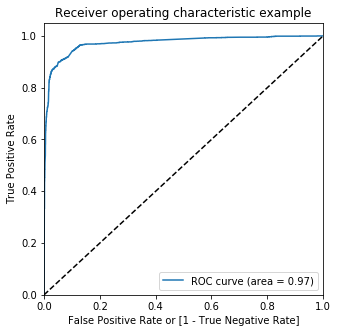

In [132]:

# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [133]:
# Are under graph is 0.97 which is good value

In [134]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.998485,1,1,1,1,1,1,1,1,1,1,1
1,1,0.997603,1,1,1,1,1,1,1,1,1,1,1
2,0,0.020213,0,1,0,0,0,0,0,0,0,0,0
3,0,0.006966,0,1,0,0,0,0,0,0,0,0,0
4,1,0.999850,1,1,1,1,1,1,1,1,1,1,1


In [135]:

# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.375021,1.000000,0.000000
0.1,0.1,0.892969,0.968681,0.847538
0.2,0.2,0.910174,0.954124,0.883801
0.3,0.3,0.922084,0.910013,0.929328
0.4,0.4,0.929859,0.899427,0.948121
0.5,0.5,0.931679,0.872519,0.967178
0.6,0.6,0.931844,0.860609,0.974590
0.7,0.7,0.929363,0.849581,0.977237
0.8,0.8,0.924731,0.830172,0.981472
0.9,0.9,0.882051,0.700926,0.990736


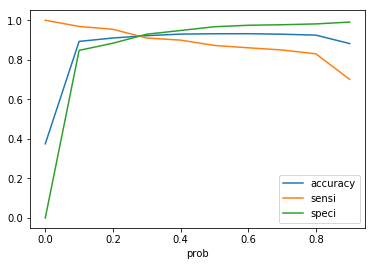

In [136]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [137]:
# optimal cut off shows around 0.30

In [138]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.30 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.998485,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.997603,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.020213,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.006966,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.999850,1,1,1,1,1,1,1,1,1,1,1,1


In [139]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9220843672456576

In [140]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3511,  267],
       [ 204, 2063]], dtype=int64)

In [141]:
#Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [142]:
# Calculating the sensitivity
TP/(TP+FN)

0.9100132333480371

In [143]:
# Calculating the specificity
TN/(TN+FP)

0.9293276866066702

## Observation

- ROC IS 0.97 , very good model
- Sensitivity is 91% 
- Specificity is 92.9%
- Accuracy is 92%
- This shows that model is good

In [144]:
from sklearn.metrics import precision_score, recall_score

In [145]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.8854077253218884

In [146]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9100132333480371

In [147]:
from sklearn.metrics import precision_recall_curve

In [148]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

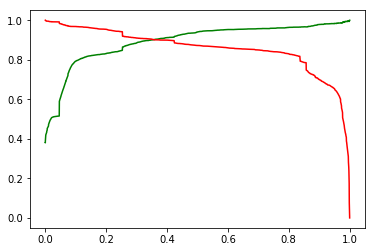

In [149]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Prediction on Test data 

In [150]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [151]:
# Substituting all the columns in the final train model
col = X_train.columns

In [152]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm.head()

,const,Total Time Spent on Website,Lead Source_welingak website,City_select,Tags_Other_Tags,Tags_already a student,Tags_closed by horizzon,Tags_diploma holder (not eligible),Tags_graduation in progress,Tags_interested in full time mba,Tags_interested in other courses,Tags_lost to eins,Tags_ringing,Tags_will revert after reading the email,Last Notable Activity_sms sent
1461,1.0,0.031250,0,1,0,0,0,0,0,0,0,0,1,0,0
6318,1.0,0.182658,0,0,0,0,0,0,0,0,0,0,0,0,1
1863,1.0,0.324824,0,1,0,0,0,0,0,0,1,0,0,0,0
685,1.0,0.125000,0,0,0,0,0,0,0,0,0,0,0,0,0
4640,1.0,0.068662,0,0,0,0,0,0,0,0,0,0,1,0,1


In [153]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.005994
1,0,0.582750
2,0,0.034437
3,0,0.070509
4,0,0.014645


In [154]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.40 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.005994,0
1,0,0.582750,1
2,0,0.034437,0
3,0,0.070509,0
4,0,0.014645,0
5,0,0.046615,0
6,1,0.993153,1
7,0,0.068707,0
8,1,0.902143,1
9,0,0.002397,0


In [155]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9224237746043998

In [156]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1543,   76],
       [ 125,  847]], dtype=int64)

In [157]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [158]:
# Calculating the sensitivity
TP/(TP+FN)

0.8713991769547325

In [159]:
# Calculating the specificity
TN/(TN+FP)

0.9530574428659666

# Observations

- Sensitivity is 87% 
- Specificity is 95%
- Accuracy is 92.2%
- This shows that model is good

###### The Model seems to predict the Conversion Rate very well 
- we can give to ceo with high confidence to predict well